# Creating a newural network using the housing data csv 
I have used the dataset from kaggle, here is the link :

https://www.kaggle.com/harlfoxem/housesalesprediction

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

Importing the Data

In [4]:
df = pd.read_csv('kc_house_data.csv')

## Exploratory Data Analysis

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Visualiztion 

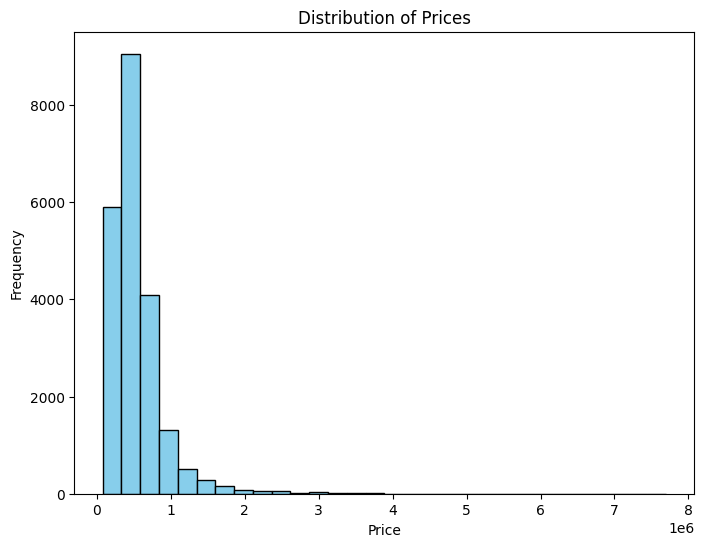

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


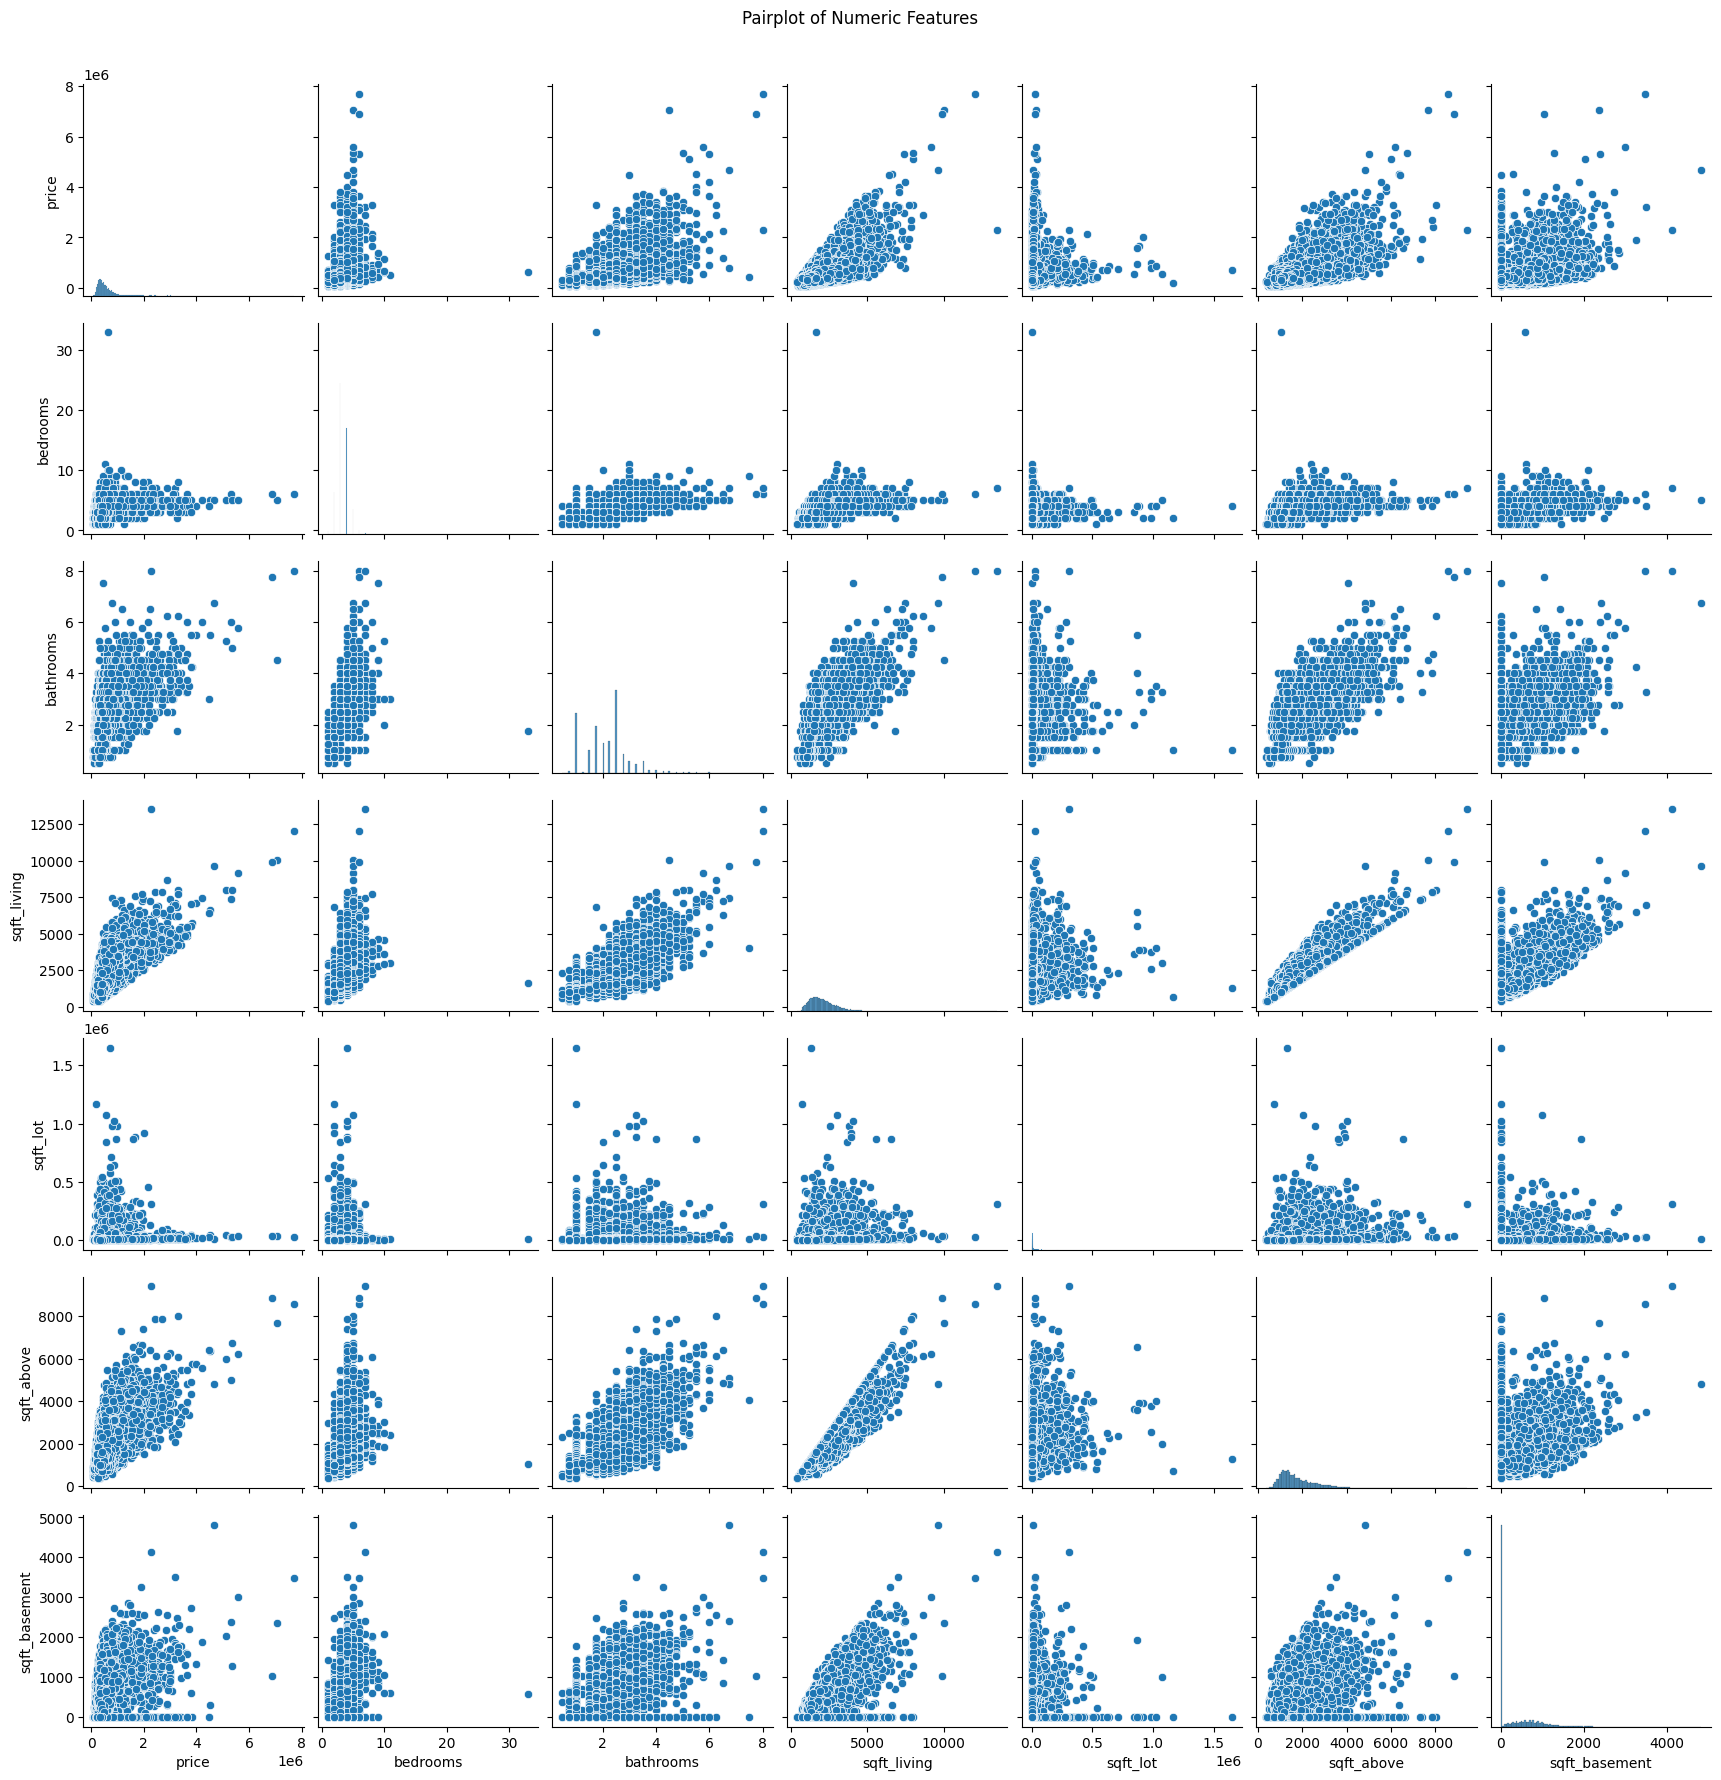

In [12]:
# Selecting numeric columns for pairplot
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


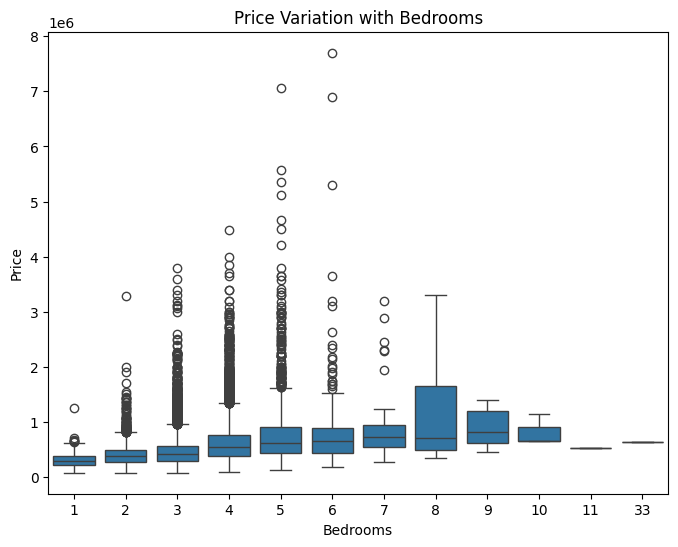

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Variation with Bedrooms')
plt.show()


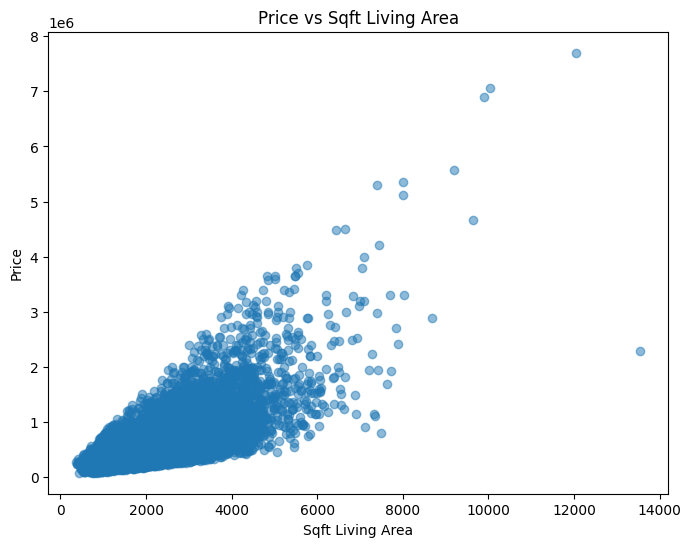

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.title('Price vs Sqft Living Area')
plt.show()


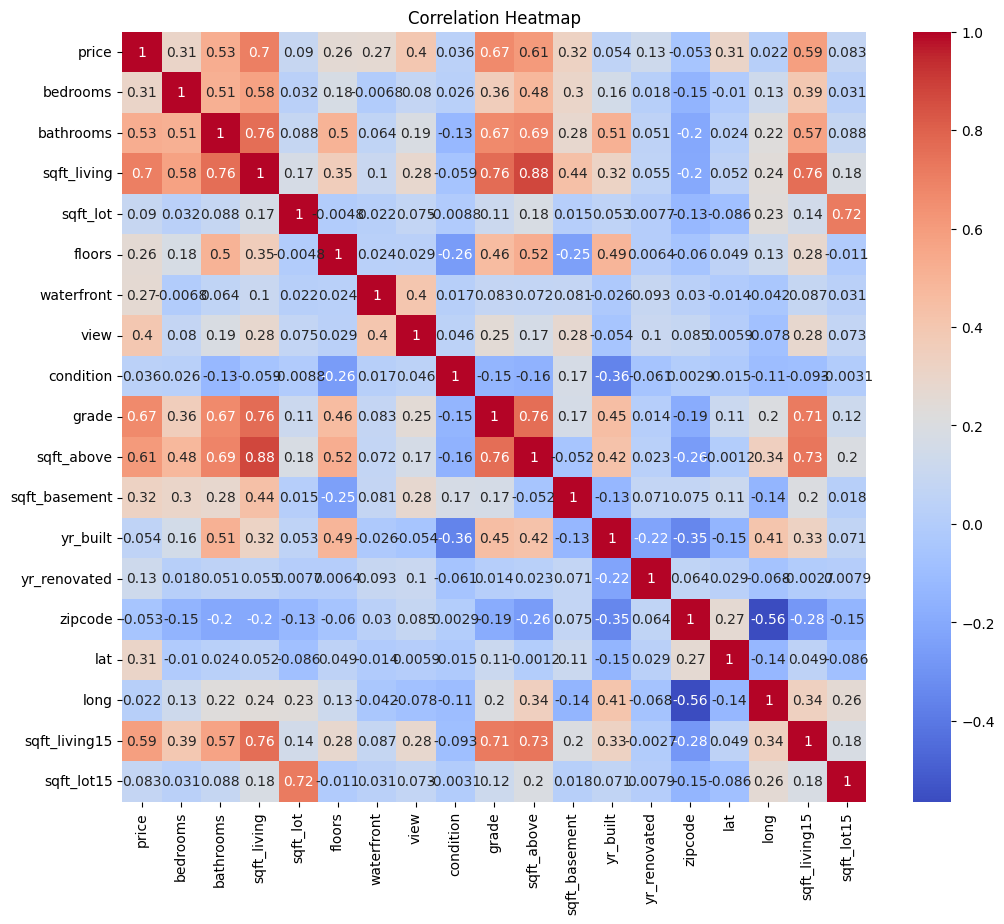

In [17]:
# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Removing non-numeric columns like 'id'
numeric_columns = numeric_columns.drop(columns=['id'])

# Calculating correlation
corr = numeric_columns.corr()

# Plotting heatmap with a larger size (e.g., figsize=(12, 10))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

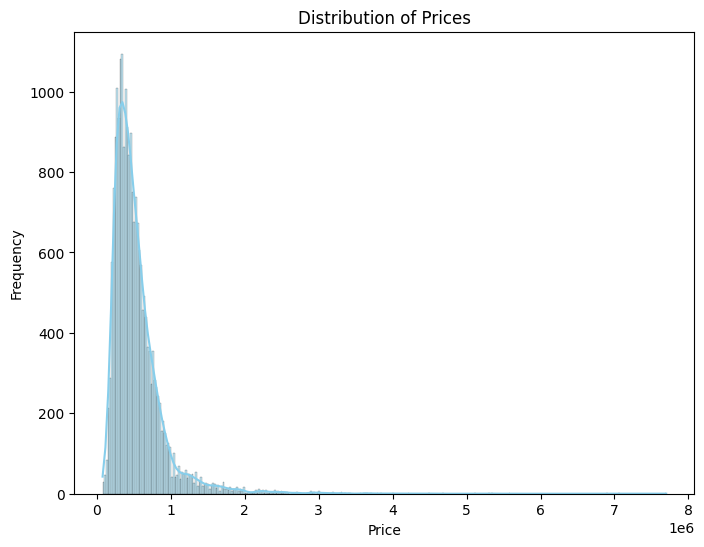

In [18]:
# Creating a displot for the 'price' column with customized colors
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

## Splitting the Data

In [19]:
df = df.drop(['id','date','zipcode'],axis=1)

In [20]:
X = df.drop('price',axis=1)
y = df['price']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Scaling the data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the neural network

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=300)

Epoch 1/300
119/119 [==============================] - 0s 1ms/step - loss: 430240333824.0000 - val_loss: 418917711872.0000
Epoch 2/300
119/119 [==============================] - 0s 644us/step - loss: 429223739392.0000 - val_loss: 415462293504.0000
Epoch 3/300
119/119 [==============================] - 0s 632us/step - loss: 415852265472.0000 - val_loss: 385170669568.0000
Epoch 4/300
119/119 [==============================] - 0s 641us/step - loss: 350825480192.0000 - val_loss: 279125917696.0000
Epoch 5/300
119/119 [==============================] - 0s 637us/step - loss: 209988747264.0000 - val_loss: 131682238464.0000
Epoch 6/300
119/119 [==============================] - 0s 622us/step - loss: 107311816704.0000 - val_loss: 90606911488.0000
Epoch 7/300
119/119 [==============================] - 0s 630us/step - loss: 92600590336.0000 - val_loss: 88746680320.0000
Epoch 8/300
119/119 [==============================] - 0s 623us/step - loss: 90979213312.0000 - val_loss: 87379435520.0000
Epoch 9

In [27]:
loss = pd.DataFrame(model.history.history)

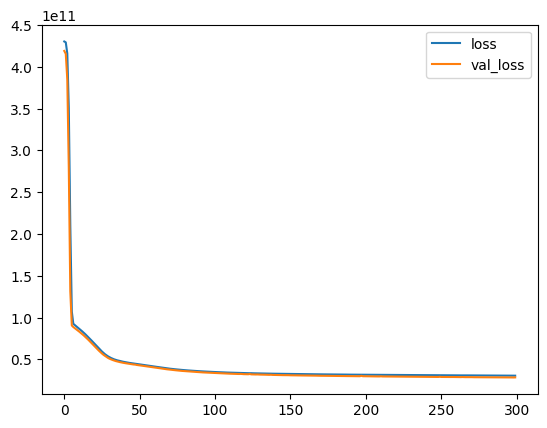

In [29]:
loss.plot()
plt.show()

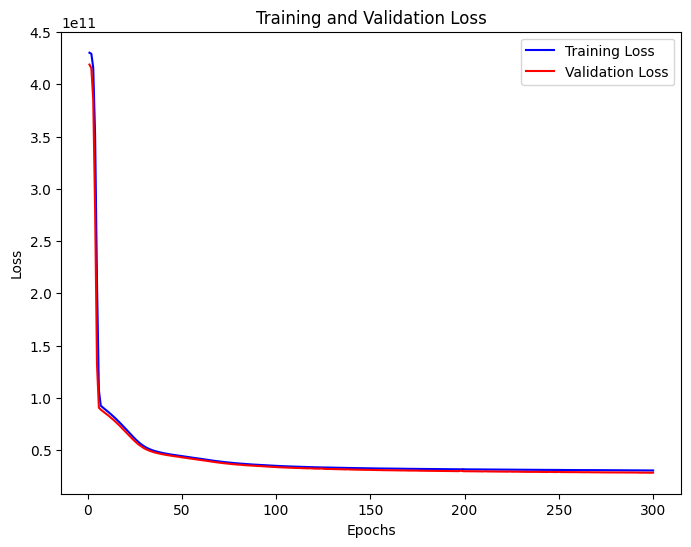

In [30]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')  # Blue line for training loss
plt.plot(epochs, val_loss, 'r', label='Validation Loss')  # Red line for validation loss
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation 

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [32]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 244us/step


In [33]:
mean_absolute_error(y_test,predictions)

104565.5155550733

In [34]:
np.sqrt(mean_squared_error(y_test,predictions))

168852.61171880257

In [35]:
explained_variance_score(y_test,predictions)

0.7855789151240681

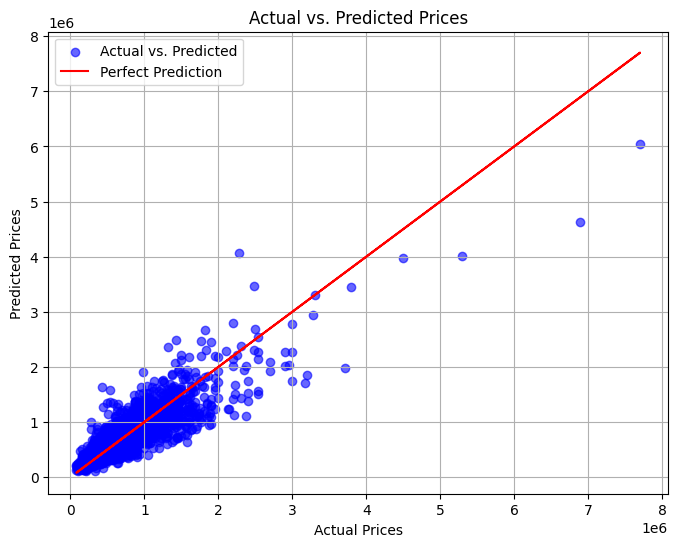

In [37]:
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs. predicted values
plt.scatter(y_test, predictions, alpha=0.6, color='blue', label='Actual vs. Predicted')

# Perfect predictions line
plt.plot(y_test, y_test, 'r', label='Perfect Prediction')

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


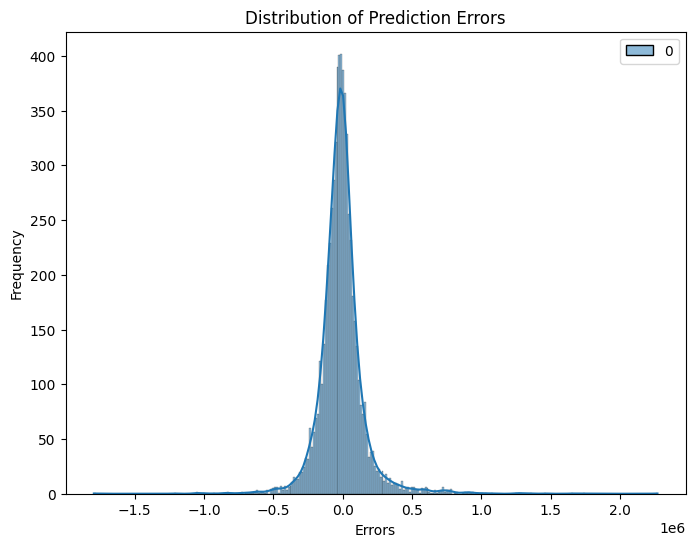

In [40]:
errors = y_test.values.reshape(6480, 1) - predictions
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()
